Carga de librerias

In [1]:
### Protecto Final
#Carga de librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

Leer el archivo

In [2]:
Tabla_InventarioInicial = pd.read_csv("BegInvFINAL12312016.csv",sep=',')

### Para darnos una idea general de los datos, se imprimen las primeros 5 lineas.

In [3]:
Tabla_InventarioInicial.head()

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8,12.99,2016-01-01
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,7,10.99,2016-01-01
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,6,36.99,2016-01-01
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,3,38.99,2016-01-01
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,6,34.99,2016-01-01


# Análisis exploratorio de datos

In [4]:
# Se creó una función donde devuelve una tabla con la info necesaria para obtener información de los datos.
def dataframe_info(df):
    report = pd.DataFrame(columns=['Columna', 'TipoDato', 'Filas', 'Valores Unicos', 'Missings', 'Missings (%)'])
    for column in df.columns:
        data_type = df[column].dtype
        rows = df[column].shape[0] 
        unique_count = df[column].nunique()
        missing_values = df[column].isnull().sum()
        missing_percentage = (missing_values / len(df)) * 100
        report.loc[len(report)] = [column, data_type, rows, unique_count,  missing_values, missing_percentage.round(4)]
    return report

In [5]:
dataframe_info(Tabla_InventarioInicial)

,Columna,TipoDato,Filas,Valores Unicos,Missings,Missings (%)
0,InventoryId,object,206529,206529,0,0.0
1,Store,int64,206529,79,0,0.0
2,City,object,206529,67,0,0.0
3,Brand,int64,206529,8094,0,0.0
4,Description,object,206529,7291,0,0.0
5,Size,object,206529,41,0,0.0
6,onHand,int64,206529,474,0,0.0
7,Price,float64,206529,329,0,0.0
8,startDate,object,206529,1,0,0.0


Comprobamos si hay duplicados.

In [6]:
duplicados = Tabla_InventarioInicial.duplicated().any()
if duplicados:
    print(f"El dataset tiene duplicados.")
else:
    print(f"El dataset no tiene duplicados.")

El dataset no tiene duplicados.


La exploración de datos ayuda a identificar irregularidades que necesitan limpieza y preprocesamiento:

- El formato de fecha difiere entre tablas. Por ejemplo, la tabla de VentasFinal utiliza mm/dd/aaaa, mientras que las otras como esta utilizan aaaa/mm/dd.

Realizamos un analisis descriptivo de cada columna

In [7]:
#iteramos sobre cada columna de nuestro dataframe con un cilo for
for i in Tabla_InventarioInicial.columns:
    print(i)
    print(Tabla_InventarioInicial[i].describe()) 
    print('------------------------')

InventoryId
count                 206529
unique                206529
top       79_BALLYMENA_90089
freq                       1
Name: InventoryId, dtype: object
------------------------
Store
count    206529.000000
mean         42.122457
std          23.191393
min           1.000000
25%          22.000000
50%          42.000000
75%          64.000000
max          79.000000
Name: Store, dtype: float64
------------------------
City
count        206529
unique           67
top       MOUNTMEND
freq          14264
Name: City, dtype: object
------------------------
Brand
count    206529.000000
mean      13761.482320
std       13059.429355
min          58.000000
25%        3746.000000
50%        8010.000000
75%       22143.000000
max       90090.000000
Name: Brand, dtype: float64
------------------------
Description
count                   206529
unique                    7291
top       Jagermeister Liqueur
freq                       459
Name: Description, dtype: object
-----------------------

# ETL  Limpieza y preprocesamiento de datos

Se cambia el nombre a las columnas

In [8]:
Tabla_InventarioInicial.rename(columns={'InventoryId': 'Inventario_inicialID'}, inplace=True)
Tabla_InventarioInicial.rename(columns={'Store': 'Tienda'}, inplace=True)
Tabla_InventarioInicial.rename(columns={'City': 'Ciudad'}, inplace=True)
Tabla_InventarioInicial.rename(columns={'Brand': 'MarcaID'}, inplace=True)
Tabla_InventarioInicial.rename(columns={'Description': 'Descripcion'}, inplace=True)
Tabla_InventarioInicial.rename(columns={'Size': 'Tamaño'}, inplace=True)
Tabla_InventarioInicial.rename(columns={'onHand': 'Unidad_Disponible'}, inplace=True)
Tabla_InventarioInicial.rename(columns={'Price': 'Precio_venta'}, inplace=True)
Tabla_InventarioInicial.rename(columns={'startDate': 'Fecha'}, inplace=True)

Irregularidades en las entradas de datos.
La columna Size varía en la información sobre el tamaño, pero lo que nos interesa es
la cantidad de productos en cada linea, pero las que vienen de oferta ej: "pack x 3" se
deben contabilizar por 3, por lo que agregamos una columna al costado para contabilizar.

In [9]:
import re
# Función para contar las unidades
def count_units(Tamaño):
    # Si el valor contiene "Pk", extrae el número antes de "Pk"
    if 'Pk' in Tamaño:
        match = re.search(r'(\d+)\s*Pk', Tamaño)
        if match:
            return int(match.group(1))
    # En caso contrario, cuenta como 1
    return 1

# Aplicar la función a la columna 'Tamaño'
Tabla_InventarioInicial['Cantidad'] = Tabla_InventarioInicial['Tamaño'].apply(count_units)

# Mostrar el DataFrame resultante
print(Tabla_InventarioInicial)

       Inventario_inicialID  Tienda        Ciudad  MarcaID  \
0         1_HARDERSFIELD_58       1  HARDERSFIELD       58   
1         1_HARDERSFIELD_60       1  HARDERSFIELD       60   
2         1_HARDERSFIELD_62       1  HARDERSFIELD       62   
3         1_HARDERSFIELD_63       1  HARDERSFIELD       63   
4         1_HARDERSFIELD_72       1  HARDERSFIELD       72   
...                     ...     ...           ...      ...   
206524   79_BALLYMENA_46985      79     BALLYMENA    46985   
206525   79_BALLYMENA_47014      79     BALLYMENA    47014   
206526   79_BALLYMENA_47090      79     BALLYMENA    47090   
206527   79_BALLYMENA_90011      79     BALLYMENA    90011   
206528   79_BALLYMENA_90089      79     BALLYMENA    90089   

                         Descripcion Tamaño  Unidad_Disponible  Precio_venta  \
0        Gekkeikan Black & Gold Sake  750mL                  8         12.99   
1             Canadian Club 1858 VAP  750mL                  7         10.99   
2           Her

Guardamos la data en un csv.

In [10]:
Tabla_InventarioInicial.to_csv("Tabla_InventarioInicial.csv",index=False)

In [11]:
Tabla_InventarioInicial.head()

,Inventario_inicialID,Tienda,Ciudad,MarcaID,Descripcion,Tamaño,Unidad_Disponible,Precio_venta,Fecha,Cantidad
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8,12.99,2016-01-01,1
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,7,10.99,2016-01-01,1
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,6,36.99,2016-01-01,1
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,3,38.99,2016-01-01,1
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,6,34.99,2016-01-01,1


# Visualizaciones e identificacion de relaciones y patrones.

Gráfico de barras de cantidad de productos por ciudad o tienda, las 10 ciudades con mas productos.

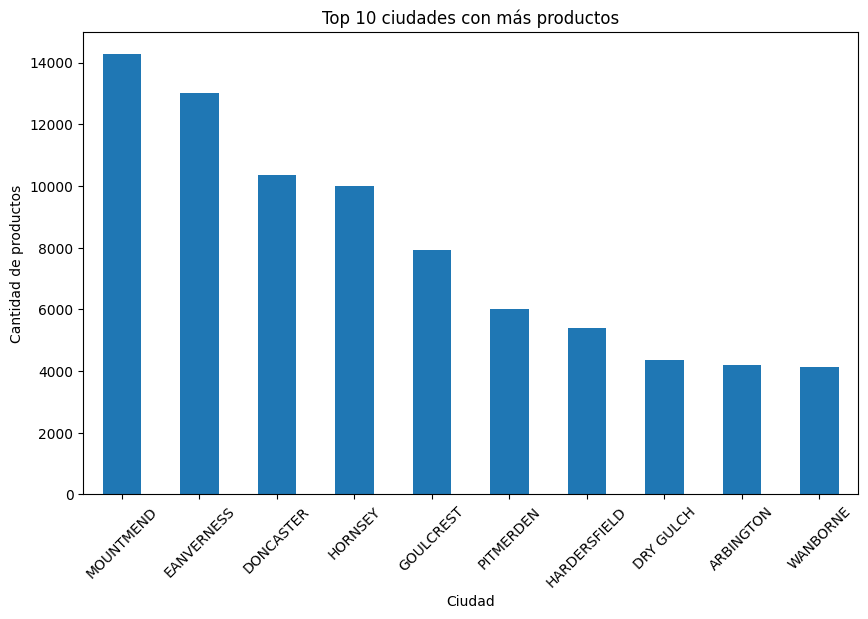

In [12]:
# Contar la cantidad de productos por ciudad y seleccionar las 10 ciudades con más productos
top_ciudades = Tabla_InventarioInicial['Ciudad'].value_counts().nlargest(10)

# Crear el gráfico de barras para las 10 ciudades con más productos
plt.figure(figsize=(10, 6))
top_ciudades.plot(kind='bar')
plt.title('Top 10 ciudades con más productos')
plt.xlabel('Ciudad')
plt.ylabel('Cantidad de productos')
plt.xticks(rotation=45)
plt.show()

Mapa de calor de correlación entre variables numéricas

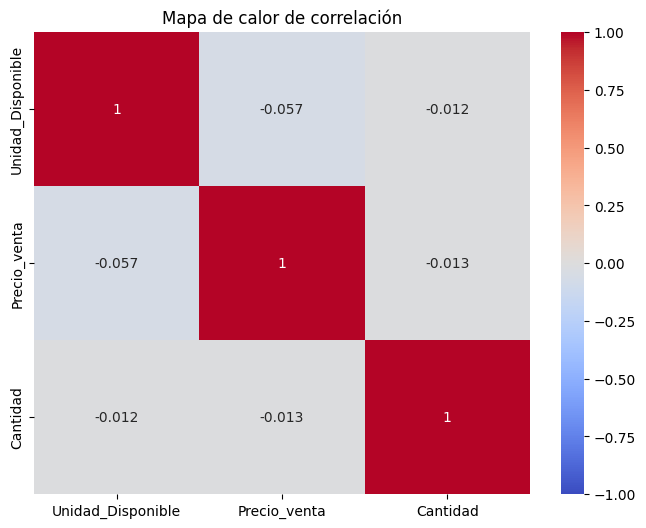

In [13]:
# Seleccionar variables numéricas para el mapa de calor
numeric_cols = ['Unidad_Disponible', 'Precio_venta', 'Cantidad']

# Calcular la matriz de correlación
correlation_matrix = Tabla_InventarioInicial[numeric_cols].corr()

# Crear el mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Mapa de calor de correlación')
plt.show()